In [69]:
#  Import relevant libraries

import pandas as pd
from sqlalchemy import create_engine
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

import joblib

In [70]:
'''#  Retreive the data from SQL 

# Define your database connection parameters
db_username = 'postgres'
db_password = 'postgres'
db_host = 'localhost'
db_port = '5432'
db_name = 'Group 4 Project Statistics'
db_table = 'refined_data_4'

# Create the connection string
connection_string = f'postgresql+psycopg2://{db_username}:{db_password}@{db_host}:{db_port}/{db_name}'

# Create the SQLAlchemy engine
engine = create_engine(connection_string)

# Query the data from your table
query = f'SELECT * FROM {db_table}'

# Read the data into a pandas DataFrame
data = pd.read_sql(query, engine)

# Close the connection
engine.dispose()

# Display the DataFrame
display(data.head())
print("Original data types:")
print(data.dtypes)'''

'#  Retreive the data from SQL \n\n# Define your database connection parameters\ndb_username = \'postgres\'\ndb_password = \'postgres\'\ndb_host = \'localhost\'\ndb_port = \'5432\'\ndb_name = \'Group 4 Project Statistics\'\ndb_table = \'refined_data_4\'\n\n# Create the connection string\nconnection_string = f\'postgresql+psycopg2://{db_username}:{db_password}@{db_host}:{db_port}/{db_name}\'\n\n# Create the SQLAlchemy engine\nengine = create_engine(connection_string)\n\n# Query the data from your table\nquery = f\'SELECT * FROM {db_table}\'\n\n# Read the data into a pandas DataFrame\ndata = pd.read_sql(query, engine)\n\n# Close the connection\nengine.dispose()\n\n# Display the DataFrame\ndisplay(data.head())\nprint("Original data types:")\nprint(data.dtypes)'

In [71]:
#  Check collected data

# Access raw data
file_path = os.path.expanduser('../resources/Refined Data 1.csv')

# Read the CSV file
data = pd.read_csv(file_path)

# Display the first few rows to verify it's loaded correctly
display(data.head())

print("Original data types:")
print(data.dtypes)

,Season End,Team,Average Distance to Away Games,Squad Value,Net Summer Transfer Spend,Retained Manager?,Average Attendance,Wage Bill,Retained Captain?,Previous Season Disciplinary Points,Net Number of Transfers,Previous Season Goal Difference,Previous Season Position,Position Bin,Games Played,Number of Managers employed in the season
0,2019,Arsenal,371,580750000,71050000,0,59989,135360000,0,67,0,23,6,2,58,1
1,2019,Bournemouth,218,294750000,71400000,1,10531,52690000,1,57,-4,-16,12,1,40,1
2,2019,Brighton,207,204450000,77000000,1,30425,42821000,1,64,3,-20,15,1,40,1
3,2019,Burnley,214,203250000,25000000,1,20534,44263000,1,65,0,-3,7,1,40,1
4,2019,Cardiff,220,87650000,51200000,1,31407,32990000,1,87,-2,-42,20,0,43,1


Original data types:
Season End                                    int64
Team                                         object
Average Distance to Away Games                int64
Squad Value                                   int64
Net Summer Transfer Spend                     int64
Retained Manager?                             int64
Average Attendance                            int64
Wage Bill                                     int64
Retained Captain?                             int64
Previous Season Disciplinary Points           int64
Net Number of Transfers                       int64
Previous Season Goal Difference               int64
Previous Season Position                      int64
Position Bin                                  int64
Games Played                                  int64
Number of Managers employed in the season     int64
dtype: object


In [72]:
# Drop any irrelevant data

# Drop the Season End column
data = data.drop('Season End', axis=1)

# Drop the Team column
data = data.drop('Team', axis=1)

# Drop the Average Distance to Away Games column

data = data.drop('Average Distance to Away Games', axis=1)

# Display the first few rows to verify it's loaded correctly

display(data.head())

print("Original data types:")

print(data.dtypes)

,Squad Value,Net Summer Transfer Spend,Retained Manager?,Average Attendance,Wage Bill,Retained Captain?,Previous Season Disciplinary Points,Net Number of Transfers,Previous Season Goal Difference,Previous Season Position,Position Bin,Games Played,Number of Managers employed in the season
0,580750000,71050000,0,59989,135360000,0,67,0,23,6,2,58,1
1,294750000,71400000,1,10531,52690000,1,57,-4,-16,12,1,40,1
2,204450000,77000000,1,30425,42821000,1,64,3,-20,15,1,40,1
3,203250000,25000000,1,20534,44263000,1,65,0,-3,7,1,40,1
4,87650000,51200000,1,31407,32990000,1,87,-2,-42,20,0,43,1


Original data types:
Squad Value                                  int64
Net Summer Transfer Spend                    int64
Retained Manager?                            int64
Average Attendance                           int64
Wage Bill                                    int64
Retained Captain?                            int64
Previous Season Disciplinary Points          int64
Net Number of Transfers                      int64
Previous Season Goal Difference              int64
Previous Season Position                     int64
Position Bin                                 int64
Games Played                                 int64
Number of Managers employed in the season    int64
dtype: object


In [73]:
#  Preprocessing

# Function to identify problematic columns
def identify_mixed_type_columns(df):
    mixed_type_columns = []
    for column in df.columns:
        if df[column].dtype == 'object':
            try:
                pd.to_numeric(df[column])
            except ValueError:
                if df[column].str.contains(',').any():  # Check if any cell contains a comma
                    mixed_type_columns.append(column)
    return mixed_type_columns

# Identify problematic columns
problematic_columns = identify_mixed_type_columns(data)
print("Problematic columns:", problematic_columns)

# Handle problematic columns
for column in problematic_columns:
    data[column] = data[column].str.replace(',', '')  # Remove commas
    data[column] = pd.to_numeric(data[column], errors='coerce')  # Convert to numeric, invalid parsing will be set as NaN

# Identify numeric and categorical columns
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

# After identifying numeric and categorical features
print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

# Create preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore'))
])

# Check if there are any categorical features
if len(categorical_features) == 0:
    print("No categorical features found. Adjusting preprocessor.")
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features)
        ])
else:
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

# Remove 'Position Bin' from features if it's present
if 'Position Bin' in numeric_features:
    numeric_features.remove('Position Bin')
if 'Position Bin' in categorical_features:
    categorical_features.remove('Position Bin')

# Create preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

Problematic columns: []
Numeric features: ['Squad Value', 'Net Summer Transfer Spend', 'Retained Manager?', 'Average Attendance', 'Wage Bill', 'Retained Captain?', 'Previous Season Disciplinary Points', 'Net Number of Transfers', 'Previous Season Goal Difference', 'Previous Season Position', 'Position Bin', 'Games Played', 'Number of Managers employed in the season']
Categorical features: []
No categorical features found. Adjusting preprocessor.


In [74]:
# Prepare the features and target

X = data.drop('Position Bin', axis=1)
y = data['Position Bin']

In [75]:
# Encode target variable

le = LabelEncoder()
y = le.fit_transform(y)

In [76]:
# Split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Fit the preprocessor on the training data and transform both training and test data

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [78]:
# Get feature names after preprocessing

feature_names = numeric_features.copy()
if len(categorical_features) > 0:
    onehot_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
    cat_feature_names = onehot_encoder.get_feature_names_out(categorical_features).tolist()
    feature_names += cat_feature_names


In [79]:
# Convert to DataFrames

X_train_preprocessed = pd.DataFrame(X_train_preprocessed, columns=feature_names)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed, columns=feature_names)

In [80]:
print("Preprocessing complete. Ready for model training.")
print(f"Training set shape: {X_train_preprocessed.shape}")
print(f"Testing set shape: {X_test_preprocessed.shape}")

Preprocessing complete. Ready for model training.
Training set shape: (96, 12)
Testing set shape: (24, 12)


In [81]:
# Display sample of preprocessed features to verify

display("\nSample of preprocessed features (training set):")
display(X_train_preprocessed.head())

'\nSample of preprocessed features (training set):'

,Squad Value,Net Summer Transfer Spend,Retained Manager?,Average Attendance,Wage Bill,Retained Captain?,Previous Season Disciplinary Points,Net Number of Transfers,Previous Season Goal Difference,Previous Season Position,Games Played,Number of Managers employed in the season
0,-0.640705,-0.506888,0.545250,-1.529219,-0.640421,0.774597,-0.582229,0.367045,-0.774411,1.039772,-1.056184,-0.603023
1,2.616210,-0.386793,0.545250,1.049040,1.334602,0.774597,-0.582229,-0.267844,2.545438,-1.433597,1.625512,-0.603023
2,-0.558365,-0.258940,-1.834022,-0.180602,-0.222893,-1.290994,-0.114776,0.049601,-0.915681,1.393110,-0.800784,1.206045
3,0.595560,0.219922,0.545250,0.947495,0.016145,0.774597,-0.381892,0.367045,0.991466,-0.903589,0.603914,-0.603023
4,0.417982,-0.122062,0.545250,1.157320,0.528483,0.774597,-0.982903,-1.220176,0.567656,-0.373582,0.859313,1.206045


In [82]:
# Print feature names after preprocessing

print("\nFeature names after preprocessing:")
print(X_train_preprocessed.columns.tolist())


Feature names after preprocessing:
['Squad Value', 'Net Summer Transfer Spend', 'Retained Manager?', 'Average Attendance', 'Wage Bill', 'Retained Captain?', 'Previous Season Disciplinary Points', 'Net Number of Transfers', 'Previous Season Goal Difference', 'Previous Season Position', 'Games Played', 'Number of Managers employed in the season']


In [83]:
# Train a RandomForest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_preprocessed.values, y_train)

RandomForestClassifier(random_state=42)

In [84]:
# Make predictions

y_pred = rf.predict(X_test_preprocessed)

c:\Users\Jamie\anaconda3\envs\dev\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [85]:
# Evaluate the model

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.91      0.83      0.87        12
           2       0.80      1.00      0.89         8

    accuracy                           0.88        24
   macro avg       0.90      0.86      0.87        24
weighted avg       0.89      0.88      0.87        24


Confusion Matrix:
[[ 3  1  0]
 [ 0 10  2]
 [ 0  0  8]]


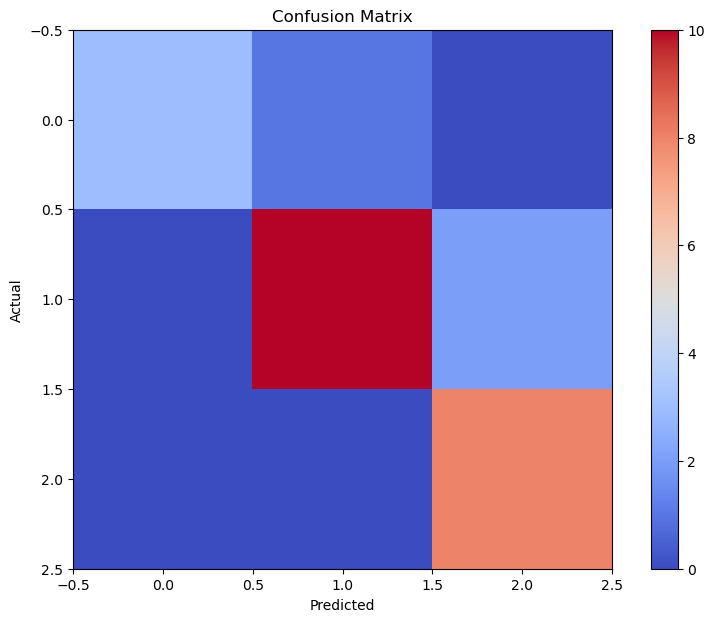

In [86]:
# Visualize the confusion matrix

plt.figure(figsize=(10, 7))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(conf_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Top 10 Most Important Features:
    Importance                                    Feature
0     0.216152                                Squad Value
1     0.160188                               Games Played
2     0.123730                                  Wage Bill
3     0.106764            Previous Season Goal Difference
4     0.088640                   Previous Season Position
5     0.064394                         Average Attendance
6     0.064042        Previous Season Disciplinary Points
7     0.053760  Number of Managers employed in the season
8     0.049419                    Net Number of Transfers
9     0.049072                  Net Summer Transfer Spend
10    0.013157                          Retained Captain?
11    0.010682                          Retained Manager?


<Figure size 1000x600 with 0 Axes>

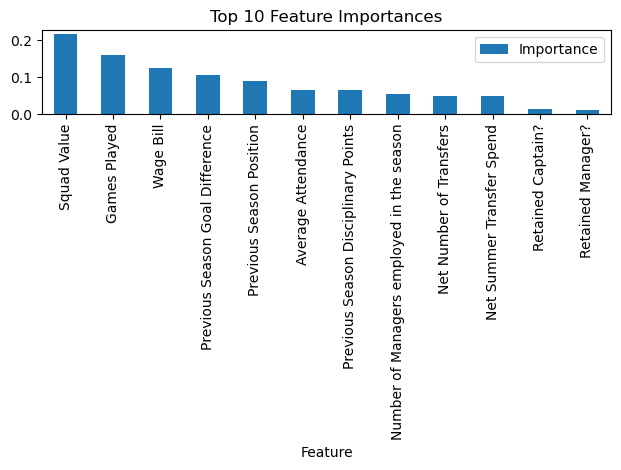

In [87]:
# Get feature importances

importances = rf.feature_importances_
feature_imp = pd.DataFrame(sorted(zip(importances, X_train_preprocessed.columns), reverse=True), 
                           columns=['Importance', 'Feature'])

# Display top 10 most important features

print("\nTop 10 Most Important Features:")
print(feature_imp.head(10))

# Visualize feature importances

plt.figure(figsize=(10, 6))
feature_imp.head(10).plot(x='Feature', y='Importance', kind='bar')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

In [88]:
#use joblib to save model

joblib.dump(rf, '../app/model.joblib')

['../app/model.joblib']